<a href="https://colab.research.google.com/github/s-varma23/DO180-apps/blob/master/IST_718_Spring_2022_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Grading Feedback Cell

**Question 0 (-2 pts if not provided):**  Enter your name and SU ID in the cell below.

Your name and SU ID Here:


# IST 718: Big Data Analytics

- Professors: 
  - Willard Williamson <wewillia@syr.edu>
  - Emory Creel <emcreel@syr.edu>
- Faculty Assistant: Shubham Sharma <shsharma@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.

#### Read the data files
The cell below reads the assignment data files from github

In [ ]:
%%bash
# define an array of data file names
data_file_array=("indicator_gapminder_population.csv" "indicator_gapminder_under5mortality.csv" "indicator_life_expectancy_at_birth.csv" "indicator_undata_total_fertility.csv")

# for each data file
for file in ${data_file_array[@]}; do
  # if the data file does not exist on the local computer
  if [[ ! -f ./${file} ]]; then 
    # download the data file from github and save it on the local computer
    wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/${file} &> /dev/null
  fi  
done

# Question 1 (10 pts)
In the game of [roullete](https://en.wikipedia.org/wiki/Roulette) you can bet on several things including if the ball will land on black or red. In a black or red bet, if you win, you double your earnings. How does the casino make money? If you look at the possibilities you realize that the chance of red or black are both slightly less than 1/2. There are two green spots, so the chance of landing on black (or red) is actually 18/38, or 9/19.<br>
Create a utility function which can be used in a monte carlo simulation named get_outcome. The get_outcome function takes as an argument the number of times you play (or spin) the roulette wheel and returns the player's earnings for the number of spins specified.  Assume that the player bets exactly one dollar on black for each spin of the wheel.

In [ ]:
# your code here
import random

def get_outcome(plays):
  black=[]
  win=0 #Player starts with 1 dollar
  black=random.sample(range(0, 37), 18) #Creating a list of 18 black slots
  for i in range(plays):

    num1 = random.randint(0, 37) # The slot where the ball falls during the play
    if num1 in black:
       win=win+1
    else: 
      win=win-1
  return win




In [ ]:
# Grading cell - do not change or delete
num_plays = 10000
get_outcome(num_plays) / num_plays

-7

##### Grading Feedback Cell

# Question 2 (10 pts)
Using the get_outcome function defined above, use a monte carlo simulation to study the distribution of total earnings.  Run 4 simulations for number of roulette plays = 10, 25, 100, and 1000 where each of the 4 simulations is executed 500 times.  Collect the results into a 2 dimensional numpy array named roulette_sim_array.  Make histogram plots for each of the 4 simulations.  Based on the histogram plots, describe what happens to toal earnings as the number of plays increases.

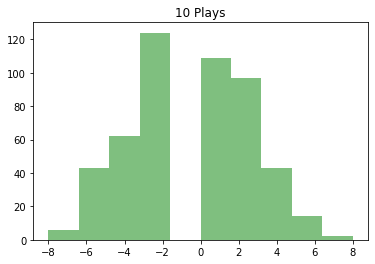

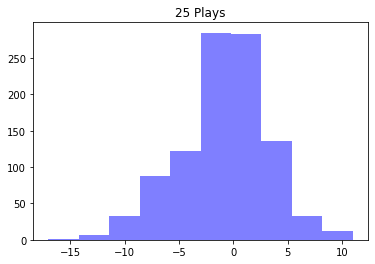

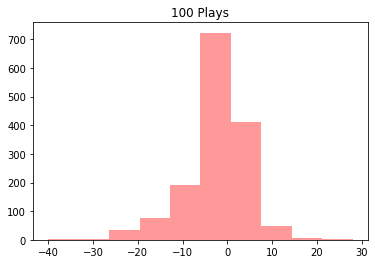

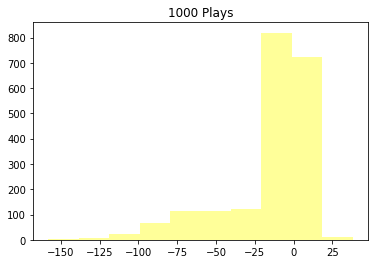

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# your code here
num_plays=[10,25,100,1000]
roulette_sim_array1=[]
play_10=[]
play_25=[]
play_100=[]
play_1000=[]

for plays in num_plays:
  for i in range(1,501):
    x=get_outcome(plays)
    roulette_sim_array1=np.append(roulette_sim_array1,x)
  if plays == 10:
    play_10=roulette_sim_array1
    plt.hist(roulette_sim_array1,alpha=0.5,
         label='Plays 10', color = 'green')
    plt.title("10 Plays")
    plt.show()
  
  if plays == 25:
    play_25=roulette_sim_array1
    plt.hist(roulette_sim_array1,alpha=0.5,
         label='Plays 25', color = 'blue')
    plt.title("25 Plays")
    plt.show()

  if plays == 100:
    play_100=roulette_sim_array1
    plt.hist(roulette_sim_array1,alpha=0.4,
         label='Plays 100', color = 'red')
    plt.title("100 Plays")
    plt.show()

  if plays == 1000:
    play_1000=roulette_sim_array1
    plt.hist(roulette_sim_array1,alpha=0.4,
         label='Plays 1000', color = 'yellow')
    plt.title("1000 Plays")
    plt.show()




roulette_sim_array = np.array([np.array(play_10),np.array(play_25),np.array(play_100), np.array(play_1000)])
#roulette_sim_array



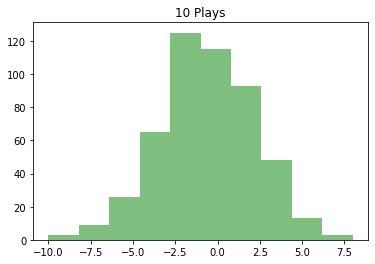

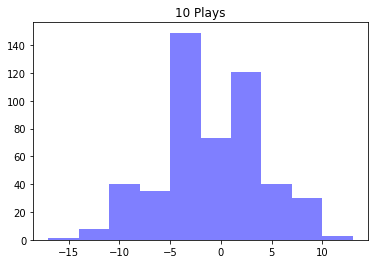

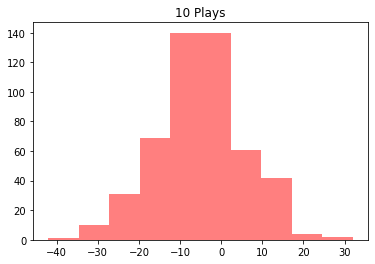

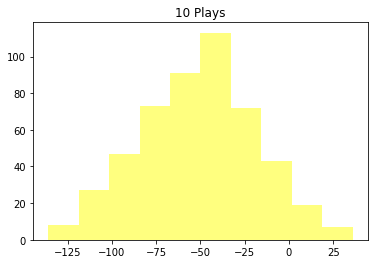

array([[  6,   0,  -4, ...,   2,  -2,   4],
       [ -7,  -9,  -5, ...,  -1, -11,  -5],
       [-16,  14, -16, ..., -12,  10,   2],
       [-40, -16, -10, ..., -90, -50, -88]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# your code here

play_10=[]
play_25=[]
play_100=[]
play_1000=[]

for i in range(1,501):
    x=get_outcome(10)
    play_10.append(x)

for i in range(1,501):
    y=get_outcome(25)
    play_25.append(y)

for i in range(1,501):
    z=get_outcome(100)
    play_100.append(z)

for i in range(1,501):
    a=get_outcome(1000)
    play_1000.append(a)

  

plt.hist(play_10,alpha=0.5,
    label='Plays 10', color = 'green')
plt.title("10 Plays")
plt.show()

plt.hist(play_25,alpha=0.5,
    label='Plays 25', color = 'blue')
plt.title("10 Plays")
plt.show()

plt.hist(play_100,alpha=0.5,
    label='Plays 100', color = 'red')
plt.title("10 Plays")
plt.show()

plt.hist(play_1000,alpha=0.5,
    label='Plays 1000', color = 'yellow')
plt.title("10 Plays")
plt.show()

roulette_sim_array = np.array([np.array(play_10),np.array(play_25),np.array(play_100), np.array(play_1000)])
roulette_sim_array



##### Grading Feedback Cell

Your explanation here:<br>  The frequencies of 1000 outcomes generated by this simulation will forms a normal distribution(bell curve). The most likely return is in the middle of the curve, in the curve observed above the mid point lies at -50, so as the number of plays increases the earning capacity tends to hover around a decreasing mark.


##### Grading Feedback Cell

# Question 3 (10 pts)
Using the central limit theorem, create a pandas dataframe named roulette_df containing the sampling distribution of the means from the sample data in the numpy array above.  The pandas dataframe shall have 4 columns labeled with the simulation names. Using data in the roulette_df, plot histograms for each of the sampling distributions - you should have 4 histograms in total.<br>  

The following question is based on the theory of central limit theorem sampling.  Assuming you don't know the underlying distribution of the population from which the samples were drawn, some of the histograms are gauranteed to be Gaussian in shape, some are not gauranteed, and some are in a transition region. For each of the 4 simulations, describe if you think the shape is gauranteed to be gaussian, not gauranteed to be Gaussian, or in a transition area between a gaurantee and no gaurantee.

In [ ]:
import pandas as pd

roulette_df = pd.DataFrame()
pl_10=[]
pl_25=[]
pl_100=[]
pl_1000=[]

for ele in play_10:
  mean= ele/10
  pl_10.append(mean)
for ele in play_25:
  mean= ele/25
  pl_25.append(mean)

for ele in play_100:
  mean= ele/100
  pl_100.append(mean)

for ele in play_1000:
  mean= ele/1000
  pl_1000.append(mean)

roulette_df["Play_10"]= pl_10
roulette_df["Play_25"]= pl_25
roulette_df["Play_100"]= pl_100
roulette_df["Play_1000"]= pl_1000
roulette_df

,Play_10,Play_25,Play_100,Play_1000
0,0.6,-0.28,-0.16,-0.040
1,0.0,-0.36,0.14,-0.016
2,-0.4,-0.20,-0.16,-0.010
3,0.2,0.12,0.06,-0.064
4,-0.2,-0.20,0.08,-0.008
...,...,...,...,...
495,-0.4,0.12,0.04,-0.056
496,0.0,0.12,-0.20,-0.082
497,0.2,-0.04,-0.12,-0.090
498,-0.2,-0.44,0.10,-0.050


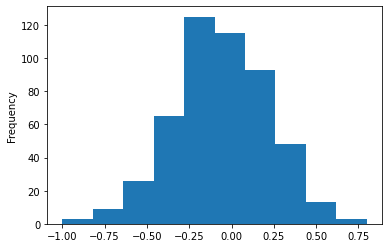

In [ ]:
roulette_df["Play_10"].plot.hist()

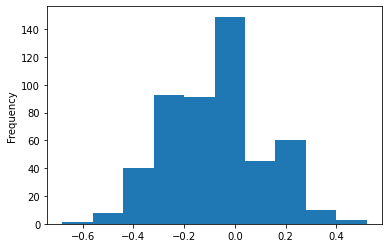

In [ ]:

roulette_df["Play_25"].plot.hist()

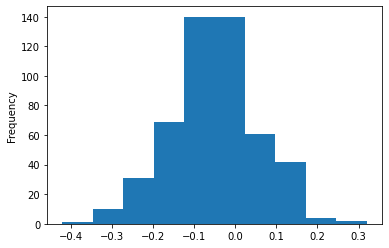

In [ ]:
roulette_df["Play_100"].plot.hist()

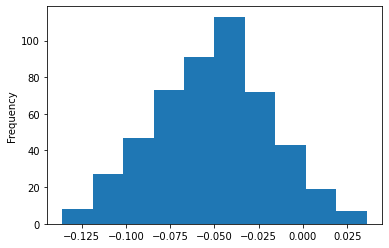

In [ ]:
roulette_df["Play_1000"].plot.hist()

In [ ]:
# Grading cell - do not modify
display(roulette_df.head())

,Play_10,Play_25,Play_100,Play_1000
0,0.6,-0.28,-0.16,-0.040
1,0.0,-0.36,0.14,-0.016
2,-0.4,-0.20,-0.16,-0.010
3,0.2,0.12,0.06,-0.064
4,-0.2,-0.20,0.08,-0.008


##### Grading Feedback Cell

Your explanation here:<br>
PLOT 1: Is in transition of been a gaussian distribution as the peaks between 0.0 to 0.025 are quite close to each other 

Plot 2 : This is gauranteed to be gaussian as the distribution doesn't have to be symettric ie the mean isn't centered

Plot 3: Perfect bell shaped curved where the mean is centered between -0.025

Plot 4 : Almost a gaussian distribution where the mean is centered close to -0.035

##### Grading Feedback Cell

# Question 4 (20 pts)
Create a new monte carlo simulation that calculates the probability that the casino loses money based on the number of times that a player plays roulette.  Create a function p_casino_loss that takes as an argument the number of times that the player plays roulette (n_plays), and returns the probability that the casino loses money.  Your code should simulate spinning the roulette wheel.  Run the n_plays simulation a fixed large number of times (100 works) and return the average probability result.  Using data collected from p_casino_loss, produce a line plot that shows the probability that the casino loses money vs. the number of games played for number of games between 25 and 1000.  Describe what the results of the simulation show.

In [ ]:
# your code here
def p_casino_loss(n_plays):
  black=[]
  win=0 
  p_win=0
  black=random.sample(range(0, 37), 18) #Creating a list of 18 black slots
  for i in range(n_plays):
    num1 = random.randint(0, 37) #The slot where the ball falls during the play
    if num1 in black:
       win+=1
  p_win = win/n_plays
  return p_win
  
stimulation=[]
for i in range(25,1000):
  stimulation.append(p_casino_loss(i))

avg = sum(stimulation)/len(stimulation)
print(avg)

0.47273810577624514


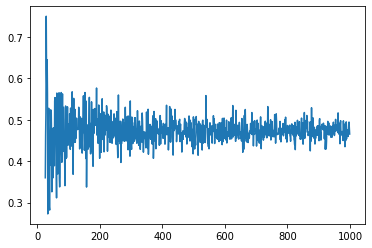

In [ ]:
x=[]
for i in range(25,1000):

  x.append(i)
plt.plot(x,stimulation)

Your explanation here:<br> The plot is the result of MCMC which stands for runing the stimulation n number of times to see the effects.

In the above graph we notice that the mean for the plot lies at 0.5 which states that there are equal probabilites to win and loss.


##### Grading Feedback Cell

# Question 5 (10 pts)
Compute the following matrix dot product manually by creating 2 dimensinal nympy arrays for each matrix, computing the matrix multiply using python for loops, and loading a new 2 dimensional numpy array with the answer.  Print the resulting numpy array.

$$
\quad
\begin{bmatrix} 
3 & 7 \\
6 & 9 \\
4 & 2 \\
\end{bmatrix}
\quad
*
\quad
\begin{bmatrix} 
2 & 5 & 7\\
2 & 5 & 1
\end{bmatrix}
\quad
$$

In [ ]:
# your code here
import numpy as np

#Creating the array
a = np.array([[3,7],[6,9],[4,2]])
b = np.array([[2,5,7],[2,5,1]])

#print(b)

#Intializing a blank 3x3 matrix to store the answer :
result = [[0 for x in range(3)] for y in range(3)]
#print(result)


# computing the matrix multiply using python for loops
for i in range(len(a)):
    for j in range(len(b[0])):
        for k in range(len(b)):
 
            # resulted matrix
            result[i][j] += a[i][k] * b[k][j] #loading a new 2 dimensional numpy array with the answer
 
print (result)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[20, 50, 28], [30, 75, 51], [12, 30, 30]]


##### Grading Feedback Cell

# Question 6 (10 pts)
Read each of the 4 assignment csv files into pandas dataframes named population_df, morttality_df, life_exp_df, and fertility_df.  Rename the column with the country names as "Country" in each of the dataframes.  Hint - the bash datafiles data_file_array at the start of the assignment has the file names you need to load.  Another thing you can do is click the colab file icon to the left to view the file names stored on the local colab instance.

In [ ]:
# your code here
import pandas as pd
url1= 'https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_gapminder_population.csv'
url2='https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_gapminder_under5mortality.csv'
url3='https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_life_expectancy_at_birth.csv'
url4='https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_undata_total_fertility.csv'
population_df = pd.read_csv(url1)
morttality_df=pd.read_csv(url2)
life_exp_df=pd.read_csv(url3)
fertility_df=pd.read_csv(url4)


population_df.rename(columns ={'Total population':'Country'}, inplace=True)
morttality_df.rename(columns ={'Under five mortality':'Country'}, inplace=True)
life_exp_df.rename(columns ={'Life expectancy with projections. Yellow is IHME':'Country'}, inplace=True)
fertility_df.rename(columns ={'Total fertility rate':'Country'}, inplace=True)




In [ ]:
# grading cell - do not modify
display(population_df.head())
display(morttality_df.head())
display(life_exp_df.head())
display(fertility_df.head())


,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700,15700,15700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.2110,28.200753,28.190507,28.18026,28.170013,28.159767,28.14952,28.139273,28.129027,...,53.2,53.6,54.0,54.5,54.8,55.2,55.5,56.2,56.91,57.63
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,...,74.5,74.7,74.9,75.0,75.2,75.5,75.7,75.8,75.90,76.00
4,Algeria,28.8224,28.822400,28.822400,28.82240,28.822400,28.822400,28.82240,28.822400,28.822400,...,74.8,75.0,75.3,75.6,75.9,76.1,76.2,76.3,76.40,76.50


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


##### Grading Feedback Cell

# Question 7 (10 pts)
The data frames from the question above are organized such that rows are countries and columns are years.  Reorganize each data frame such that each row contains 3 columns: country, year, and a data value.  This is known as the long or tidy format.  For example, the population data frame columns start out as country, year, year, year, ..., year.  After reorganizing, the population data frame columns will contain only 3 columns: country, year, and population.  Save the reorganized data into new data frames named tidy_population_df, tidy_morttality_df, tidy_life_exp_df, and tidy_fertility_df.  You are free to use any means necessary to perform this task but the pandas melt function may be useful.

In [ ]:
# your code here
my_list = list(population_df)
#print(my_list)

tidy_population_df = pd.melt(population_df, id_vars='Country', value_vars=my_list[1:],
             var_name='Year', value_name='Population')
tidy_morttality_df = pd.melt(morttality_df, id_vars='Country', value_vars=my_list[1:],
             var_name='Year', value_name='Mortality')
tidy_life_exp_df = pd.melt(life_exp_df, id_vars='Country', value_vars=my_list[1:],
             var_name='Year', value_name='Life Expentacy')
tidy_fertility_df = pd.melt(fertility_df, id_vars='Country', value_vars=my_list[1:],
             var_name='Year', value_name='Fertility')

In [ ]:
# grading cell - do not modify
display(tidy_population_df.head())
print(tidy_population_df.size)
display(tidy_morttality_df.head())
print(tidy_morttality_df.size)
display(tidy_life_exp_df.head())
print(tidy_life_exp_df.size)
display(tidy_fertility_df.head())
print(tidy_fertility_df.size)

,Country,Year,Population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,"410,445"
4,Algeria,1800,"2,503,218"


66825


,Country,Year,Mortality
0,Abkhazia,1800,NaN
1,Afghanistan,1800,468.58
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,375.20
4,Algeria,1800,460.21


66825


,Country,Year,Life Expentacy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.2110
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.4000
4,Algeria,1800,28.8224


63180


,Country,Year,Fertility
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


63180


##### Grading Feedback Cell

# Question 8 (10 pts)
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe.  The join operation should not throw away any data.  Name the new dataframe concat_df.  Next, delete all rows where life expectancy and fertility are NAN.

In [ ]:
# your code here

concat_df=tidy_population_df.merge(tidy_morttality_df,on=['Country','Year']).merge(tidy_life_exp_df,on=['Country','Year']).merge(tidy_fertility_df,on=['Country','Year'])
concat_df=concat_df.dropna(subset=['Life Expentacy','Fertility']) #Dropping NaN for selected columns

In [ ]:
# grading cell - do not modify
display(concat_df.head())
print(concat_df.shape)

,Country,Year,Population,Mortality,Life Expentacy,Fertility
1,Afghanistan,1800,3280000,468.58,28.2110,7.00
3,Albania,1800,"410,445",375.20,35.4000,4.60
4,Algeria,1800,"2,503,218",460.21,28.8224,6.99
7,Angola,1800,1567028,485.68,26.9800,6.93
9,Antigua and Barbuda,1800,37000,473.60,33.5360,5.00


(16077, 6)


##### Grading Feedback Cell

# Question 9 (10 pts)
Using concat_df, report the child mortality rate and life expectancy in 2015 for these 5 countries:
1. Sri Lanka
2. Poland
3. Malaysia
4. Pakistan
5. Thailand

In [ ]:
# Your code here
country = ['Sri Lanka', 'Poland', 'Malaysia','Pakistan','Thailand']
#options = ['Mortality','Life Expentacy']
result_df = concat_df[(concat_df['Year'] == '2015') & 
          concat_df['Country'].isin(country)] 
result_df[["Mortality", "Life Expentacy"]]


,Mortality,Life Expentacy
20854,8.2,75.1
20890,81.1,66.5
20898,5.2,77.3
20932,8.7,76.5
20943,12.3,75.1


##### Grading Feedback Cell